# Exploratory Data Analysis for Banking Customer Questions Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("BANKING CUSTOMER QUESTIONS - EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# Load the data
print("Loading data...")
# Excel file has malformed headers, so we read without header and assign column names manually
df = pd.read_excel('../data/raw/Коментари за сортиране.xlsx', header=None, skiprows=1)
df.columns = ['index', 'message_uid', 'created_dttm', 'question', 'department', 'col6', 'col7', 'market_segment']

print(f"Data loaded successfully! Shape: {df.shape}")

BANKING CUSTOMER QUESTIONS - EXPLORATORY DATA ANALYSIS
Loading data...
Data loaded successfully! Shape: (1962, 8)


## 1. BASIC DATA OVERVIEW

In [2]:
print("1. BASIC DATA OVERVIEW")
print("-" * 30)

print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)
print(missing_df)

print("\nFirst 3 records:")
for i in range(3):
    print(f"\n Record {i+1}:")
    print(f"   Question: '{df.iloc[i]['question']}'")
    print(f"   Department: '{df.iloc[i]['department']}'")

1. BASIC DATA OVERVIEW
------------------------------
Dataset shape: 1962 rows × 8 columns
Memory usage: 0.86 MB

Data types:
index                      int64
message_uid               object
created_dttm      datetime64[ns]
question                  object
department                object
col6                     float64
col7                     float64
market_segment            object
dtype: object

Missing values:
                Missing Count  Percentage
col7                     1962  100.000000
col6                     1962  100.000000
market_segment           1947   99.235474
index                       0    0.000000
question                    0    0.000000
created_dttm                0    0.000000
message_uid                 0    0.000000
department                  0    0.000000

First 3 records:

 Record 1:
   Question: 'До каква сума може да изтегли клиент на каса без предварителна заявка'
   Department: 'ДИРЕКЦИЯ ПАЗАР АТМ И КАСОВА ДЕЙНОСТ'

 Record 2:
   Question: 'дай ми 

## 2. QUESTION ANALYSIS


2. QUESTION ANALYSIS
------------------------------
Valid questions: 1962 out of 1962

Question length statistics:
   Min length: 2 characters
   Max length: 6331 characters
   Average length: 67.2 characters
   Median length: 50.0 characters
   Std deviation: 164.9 characters

Question length distribution:
   0-50 chars: 1001 questions ( 51.0%)
   51-100 chars:  767 questions ( 39.1%)
   101-200 chars:  151 questions (  7.7%)
   201-300 chars:   12 questions (  0.6%)
   301-500 chars:   14 questions (  0.7%)
   501-1000 chars:   14 questions (  0.7%)
   1000+ chars:    3 questions (  0.2%)


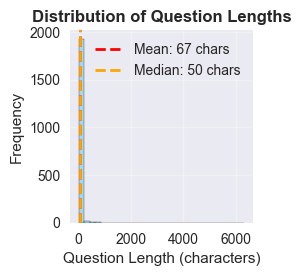

In [3]:
print("\n" + "=" * 60)
print("2. QUESTION ANALYSIS")
print("-" * 30)

# Remove null questions
valid_questions = df.dropna(subset=['question'])
print(f"Valid questions: {len(valid_questions)} out of {len(df)}")

# Question length analysis
question_lengths = valid_questions['question'].str.len()
print(f"\nQuestion length statistics:")
print(f"   Min length: {question_lengths.min()} characters")
print(f"   Max length: {question_lengths.max()} characters")
print(f"   Average length: {question_lengths.mean():.1f} characters")
print(f"   Median length: {question_lengths.median():.1f} characters")
print(f"   Std deviation: {question_lengths.std():.1f} characters")

# Question length distribution
print(f"\nQuestion length distribution:")
length_bins = [0, 50, 100, 200, 300, 500, 1000, question_lengths.max()]
length_labels = ['0-50', '51-100', '101-200', '201-300', '301-500', '501-1000', '1000+']
length_dist = pd.cut(question_lengths, bins=length_bins, labels=length_labels, include_lowest=True)
length_counts = length_dist.value_counts().sort_index()

for label, count in length_counts.items():
    percentage = (count / len(valid_questions)) * 100
    print(f"   {label} chars: {count:4d} questions ({percentage:5.1f}%)")

# 2. Question Length Distribution
plt.subplot(2, 3, 2)
plt.hist(question_lengths, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.axvline(question_lengths.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {question_lengths.mean():.0f} chars')
plt.axvline(question_lengths.median(), color='orange', linestyle='--', linewidth=2,
           label=f'Median: {question_lengths.median():.0f} chars')
plt.xlabel('Question Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Question Lengths', fontweight='bold', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

## 3. DEPARTMENT ANALYSIS


3. DEPARTMENT ANALYSIS (TARGET VARIABLE)
------------------------------
Total unique departments: 15
Records with department info: 1962 out of 1962

All departments by question count:
 1. Пазар Ежедневно банкиране                           576 ( 29.4%)
 2. Други                                               318 ( 16.2%)
 3. Пазар Жилищни и ипотечни кредити                    269 ( 13.7%)
 4. Пазар Потребителско кредитиране                     144 (  7.3%)
 5. Пазар Разсрочени плащания                           120 (  6.1%)
 6. Пазар Малък бизнес                                   95 (  4.8%)
 7. ДИРЕКЦИЯ БАНКОВИ ОПЕРАЦИИ                            83 (  4.2%)
 8. Пазар Спестяване и инвестиции                        83 (  4.2%)
 9. Няколко пазара                                       70 (  3.6%)
10. Пазар Банково застраховане                           66 (  3.4%)
11. ДИРЕКЦИЯ ПАЗАР АТМ И КАСОВА ДЕЙНОСТ                  61 (  3.1%)
12. ПРАВНО                                              

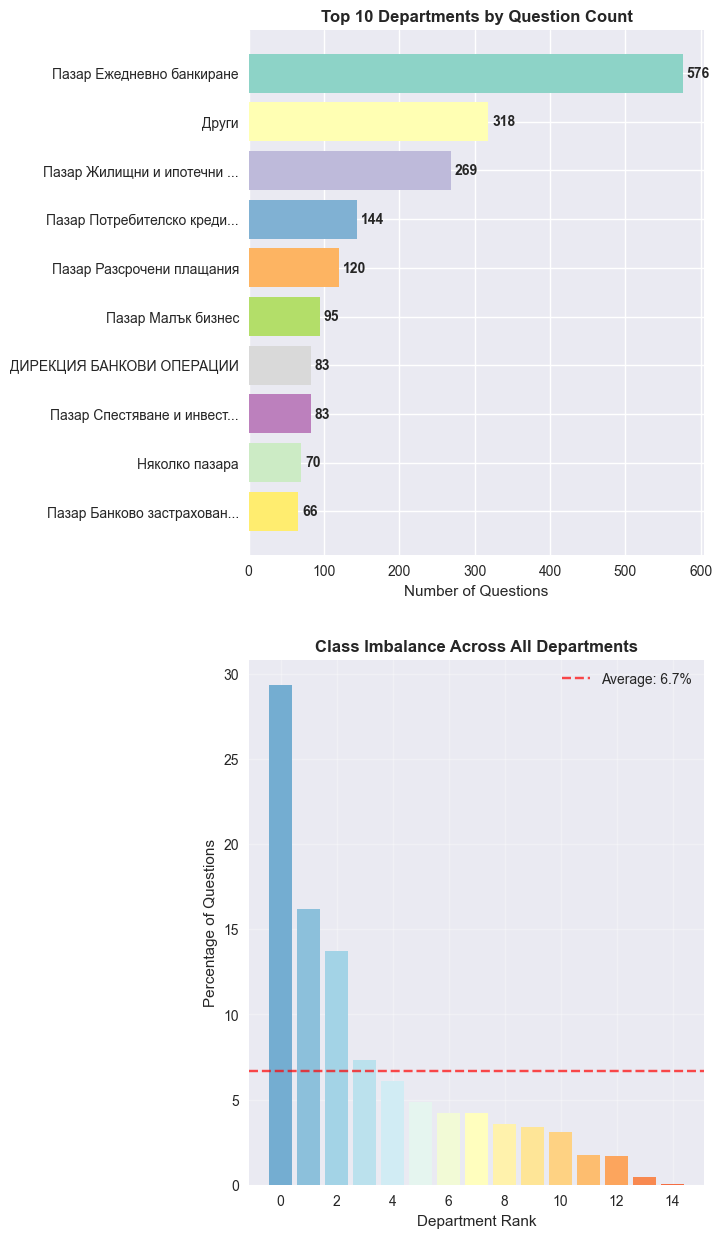

In [4]:
print("\n" + "=" * 60)
print("3. DEPARTMENT ANALYSIS (TARGET VARIABLE)")
print("-" * 30)

# Clean department data
dept_data = df.dropna(subset=['department'])
department_counts = dept_data['department'].value_counts()

print(f"Total unique departments: {len(department_counts)}")
print(f"Records with department info: {len(dept_data)} out of {len(df)}")

print(f"\nAll departments by question count:")
for i, (dept, count) in enumerate(department_counts.items(), 1):
    percentage = (count / len(dept_data)) * 100
    print(f"{i:2d}. {dept[:50]:<50} {count:4d} ({percentage:5.1f}%)")

# Department categorization
market_departments = department_counts[department_counts.index.str.contains('Пазар', case=False, na=False)]
direction_departments = department_counts[department_counts.index.str.contains('ДИРЕКЦИЯ', case=False, na=False)]
other_departments = department_counts[~department_counts.index.str.contains('Пазар|ДИРЕКЦИЯ', case=False, na=False)]

print(f"\nDepartment categorization:")
print(f"   Market departments (Пазар): {len(market_departments)} departments, {market_departments.sum()} questions")
print(f"   Direction departments (ДИРЕКЦИЯ): {len(direction_departments)} departments, {direction_departments.sum()} questions")
print(f"   Other departments: {len(other_departments)} departments, {other_departments.sum()} questions")

# Class imbalance analysis
print(f"\nClass imbalance analysis:")
largest_class_pct = (department_counts.iloc[0] / len(dept_data)) * 100
smallest_class_pct = (department_counts.iloc[-1] / len(dept_data)) * 100
print(f"   Largest class: {largest_class_pct:.1f}% ({department_counts.index[0]})")
print(f"   Smallest class: {smallest_class_pct:.1f}% ({department_counts.index[-1]})")
print(f"   Imbalance ratio: {department_counts.iloc[0] / department_counts.iloc[-1]:.1f}:1")

# Set up the plotting style
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

# Create a comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 15))

# 1. Department Distribution (Horizontal Bar Chart)
plt.subplot(2, 3, 1)
dept_counts_top10 = department_counts.head(10)
colors = plt.cm.Set3(np.linspace(0, 1, len(dept_counts_top10)))
bars = plt.barh(range(len(dept_counts_top10)), dept_counts_top10.values, color=colors)
plt.yticks(range(len(dept_counts_top10)), [dept[:25] + '...' if len(dept) > 25 else dept 
                                          for dept in dept_counts_top10.index])
plt.xlabel('Number of Questions')
plt.title('Top 10 Departments by Question Count', fontweight='bold', fontsize=12)
plt.gca().invert_yaxis()

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, dept_counts_top10.values)):
    plt.text(value + 5, bar.get_y() + bar.get_height()/2, f'{value}', 
             va='center', fontweight='bold')

plt.subplot(2, 3, 4)
dept_percentages = (department_counts / len(df)) * 100
colors_imbalance = plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(dept_percentages)))
bars = plt.bar(range(len(dept_percentages)), dept_percentages, color=colors_imbalance)
plt.xlabel('Department Rank')
plt.ylabel('Percentage of Questions')
plt.title('Class Imbalance Across All Departments', fontweight='bold', fontsize=12)
plt.xticks(range(0, len(dept_percentages), 2))
plt.grid(True, alpha=0.3)

# Highlight the imbalance
plt.axhline(dept_percentages.mean(), color='red', linestyle='--', alpha=0.7,
           label=f'Average: {dept_percentages.mean():.1f}%')
plt.legend()

## 4. DATA QUALITY ASSESSMENT

In [5]:
# Check for duplicates
duplicate_questions = df.duplicated(subset=['question'], keep=False).sum()

print(f"Duplicate questions: {duplicate_questions}")

# Check for empty/very short questions
very_short_questions = (df['question'].str.len() < 10).sum()
print(f"Very short questions (<10 chars): {very_short_questions}")

# Check market segment data quality (to highlight the issue)
segment_data = df.dropna(subset=['market_segment'])
segment_missing_pct = ((len(df) - len(segment_data)) / len(df)) * 100
print(f"\nData completeness:")
print(f"   Questions with department: {(~df['department'].isnull()).sum()}/{len(df)} ({((~df['department'].isnull()).sum()/len(df)*100):.1f}%)")
print(f"   Department column: Complete and suitable for classification target")

Duplicate questions: 0
Very short questions (<10 chars): 29

Data completeness:
   Questions with department: 1962/1962 (100.0%)
   Department column: Complete and suitable for classification target


## 5. CLASSIFICATION TASK SUMMARY

In [6]:
print("\n" + "=" * 60)
print("5. CLASSIFICATION TASK SUMMARY")
print("-" * 30)

print("TASK DEFINITION:")
print(f"   • Problem type: Multi-class text classification")
print(f"   • Input: Customer questions")
print(f"   • Output: Department assignment (15 classes)")
print(f"   • Dataset size: {len(df)} labeled examples")

print(f"\nCLASS DISTRIBUTION CHALLENGES:")
print(f"   • Highly imbalanced: {largest_class_pct:.1f}% vs {smallest_class_pct:.1f}%")
print(f"   • Largest class: '{department_counts.index[0]}' ({department_counts.iloc[0]} examples)")
print(f"   • Smallest class: '{department_counts.index[-1]}' ({department_counts.iloc[-1]} examples)")

print(f"\nDATA QUALITY FOR ML:")
print(f"    No duplicate questions")
print(f"    100% complete target labels (department)")
print(f"    {very_short_questions} very short questions need review")

print(f"\nNext: Run 02_data_preprocessing.ipynb")


5. CLASSIFICATION TASK SUMMARY
------------------------------
TASK DEFINITION:
   • Problem type: Multi-class text classification
   • Input: Customer questions
   • Output: Department assignment (15 classes)
   • Dataset size: 1962 labeled examples

CLASS DISTRIBUTION CHALLENGES:
   • Highly imbalanced: 29.4% vs 0.1%
   • Largest class: 'Пазар Ежедневно банкиране' (576 examples)
   • Smallest class: 'ДСК Лизинг' (1 examples)

DATA QUALITY FOR ML:
    No duplicate questions
    100% complete target labels (department)
    29 very short questions need review

Next: Run 02_data_preprocessing.ipynb
